** Python Lab 1**

Welcome to the python labs! These labs are designed to give you more exposure and experience using python and various packages for data analysis work.

In this lab we will:
- Read in the Watsi demo data
- Clean and inspect the data
- Transform the website log file data to a daily timeseries
- Graph and analyze the new timeseries
- Print out and analyze stats
- Save the resulting data to a file for future analysis

Let's start by importing some packages. The main ones we will be using are pandas, numpy, seaborn and matplotlib. The rest of the code in the next cell sets up default settings for the notebook or the packages and modules. Most people create a chunk of 'default' code that they re-use over and over to setup their notebooks to their liking.

- pandas - http://pandas.pydata.org/
- numpy - http://www.numpy.org/
- seaborn - https://seaborn.pydata.org/
- matplotlib - https://matplotlib.org/


In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline
#default notebook setup
MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
pd.options.display.float_format = '{:3f}'.format # suppresses scientific notation in pandas
# Seaborn styling
sns.set(context='paper', style='whitegrid')

#### Read in the Watsi demo data ####

As mentioned above, in this lesson you’ll be working with web traffic data from a nonprofit called Watsi. *Every row in this dataset corresponds to a person visiting a watsi.org page (this is known as a pageview)*. The general flow of pageviews is referred to as web traffic.

Let's reads in the data

In [2]:
data = pd.read_csv('watsi_dataset_demo.csv')
data = data.fillna('') # replace missing values with strings for easier text processing

And print out info about the dataframe using info()

In [3]:
data.info() # prints out column names, counts and dtypes in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
referrer           5000 non-null object
timestamp          5000 non-null object
title              5000 non-null object
url                5000 non-null object
user_agent         5000 non-null object
user_id            5000 non-null object
referrer_domain    5000 non-null object
website_section    5000 non-null object
platform           5000 non-null object
dtypes: object(9)
memory usage: 351.6+ KB


The Watsi web traffic can now be called via the 'data' dataframe object

In [4]:
data.head() # Quickly display the head or top 5 rows to eyeball the data

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop
3,,2016-02-05 21:19:30,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,MICHEL O,,,Desktop
4,https://watsi.org/fund-treatments,2016-02-14 19:30:08,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,ANDREE N,watsi.org,,Desktop


#### Clean and inspect the data ####

Let's change the 'timestamp' column format from an object to datetime format

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')

Confirm the change with info()

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
referrer           5000 non-null object
timestamp          5000 non-null datetime64[ns]
title              5000 non-null object
url                5000 non-null object
user_agent         5000 non-null object
user_id            5000 non-null object
referrer_domain    5000 non-null object
website_section    5000 non-null object
platform           5000 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 351.6+ KB


That's better..Now since each row equals a pageview let's add them back in so we can start to graph the data as a time series. To do that we'll create a new column in our dataframe called 'pageviews' and set it to 1 on each row.

In [7]:
data['pageviews'] = 1 

Check that we have equal number pageviews and rows

In [8]:
print('Sum of pageviews:', sum(data['pageviews']))
print('Sum of rows:', len(data))

Sum of pageviews: 5000
Sum of rows: 5000


Let's create a timeseries of the data so we can view the volume of pageviews for this period. First let's set the timestamp column as the index of the table since we are creating a timeseries.

In [9]:
data.index = data['timestamp']

Print summary info on dataframe and confirm a DatetimeIndex

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2016-02-05 00:48:23 to 2015-11-17 16:38:25
Data columns (total 10 columns):
referrer           5000 non-null object
timestamp          5000 non-null datetime64[ns]
title              5000 non-null object
url                5000 non-null object
user_agent         5000 non-null object
user_id            5000 non-null object
referrer_domain    5000 non-null object
website_section    5000 non-null object
platform           5000 non-null object
pageviews          5000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 429.7+ KB


#### Transform the website log file data to a daily timeseries ####

Now let's take the dataset and resample the timestamp index to 'days' and sum up the number of pageviews per day, then plot

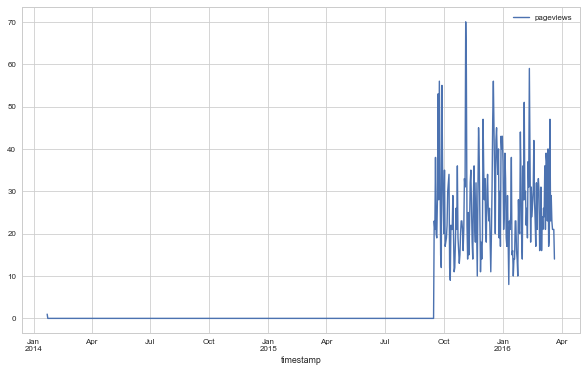

In [11]:
data.resample('D').sum().plot(figsize=(10,6)); 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

Something seems off since the data doesnt seem to start till October. Let's investigate. Let's print out the earliest date in the timeseries and also resample the time series by month.

In [12]:
print('Earliest date in the timeseries:', data['timestamp'].min())
data.resample('M').sum()

Earliest date in the timeseries: 2014-01-22 09:08:18


,pageviews
timestamp,
2014-01-31,1
2014-02-28,0
2014-03-31,0
2014-04-30,0
2014-05-31,0
...,...
2015-11-30,803
2015-12-31,994
2016-01-31,687


This is the culprit. It appears a data point from 2014 made it into the dataset. 

In [13]:
data['2014'] # Notice how I'm filting the timeseries by 'YEAR'

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,pageviews
timestamp,,,,,,,,,,
2014-01-22 09:08:18,https://watsi.org/profile/aab987cf91d0-adrienne,2014-01-22 09:08:18,Watsi | Adrienne is a mother from Haiti who ne...,https://watsi.org/profile/aab987cf91d0-adrienne,Mozilla/5.0 (Linux; Android 4.4.2; QMobile X11...,HARLAN M,watsi.org,profile,Android,1


Let's slice it out so we are only looking at 2015-2016 data

In [14]:
data = data['2015':'2016'] # Notice the slicing of the timeseries

#### Graph and analyze the new timeseries ####

And we'll replot the pageviews of Watsi over this time period

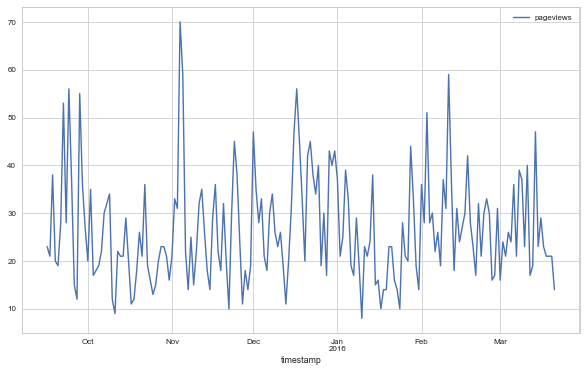

In [15]:
data.resample('D').sum().plot(figsize=(10,6));

This looks good so let's save this to a new variable for future analysis

In [16]:
daily_pageviews = data.resample('D').sum()
daily_pageviews.head() # Preview the new dataframe/timeseries

,pageviews
timestamp,
2015-09-16,23
2015-09-17,21
2015-09-18,38
2015-09-19,20
2015-09-20,19


Let's dig into the daily pageviews and see if there's any interesting stats there

In [17]:
daily_pageviews.describe()

,pageviews
count,188.000000
mean,26.590426
std,11.111843
min,8.000000
25%,19.000000
50%,23.000000
75%,33.000000
max,70.000000


Let's get some more stats and try to visualize it better. Below is a chunk of code that will calculate a series of stats. Copy and run the cell.

Stats on pageviews:

count   188.000000
mean     26.590426
std      11.111843
min       8.000000
25%      19.000000
50%      23.000000
75%      33.000000
max      70.000000
Name: pageviews, dtype: float64

median--> 23.000
mode--> 0    21
dtype: int64
variance--> 123.473
UCL--> 48.814
LCL--> 4.367
skewness--> 1.010
kurtosis--> 1.157



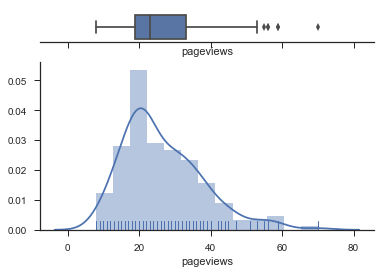

In [18]:
print('Stats on {}:\n'.format('pageviews'))
print (daily_pageviews['pageviews'].describe()) # print the .describe() method

# set stat variables
men = daily_pageviews['pageviews'].mean() # mean
mod = daily_pageviews['pageviews'].mode() # mode
med = daily_pageviews['pageviews'].median(axis = 0) # median
var = daily_pageviews['pageviews'].var() # variance
ske = daily_pageviews['pageviews'].skew() # skewness
kur = daily_pageviews['pageviews'].kurt() # kurtosis
std = daily_pageviews['pageviews'].std() # standard deviation
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations - upper control limit
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations - lower control limit

# print stats
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))

# Seaborn graphs below
sns.set(style="ticks") # sets aesthetic styling
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) # creates matplot

sns.boxplot(daily_pageviews['pageviews'].dropna(), ax=ax_box) # builds seaborns boxplot
sns.distplot(daily_pageviews['pageviews'].dropna(), ax=ax_hist, kde=True, rug=True) # builds seaborns histo

ax_box.set(yticks=[]) # adds ticks
sns.despine(ax=ax_hist) # removes border on histo
sns.despine(ax=ax_box, left=True) # removes border on box

#### Print out and analyze stats ####

We can put the previous code in a function so we can more easily call it on other columns in the dataset

In [19]:
def stats(dataframe, column):
    c = column # variable to analyze
    df = dataframe    # dataframe the variable is in

    print('Stats on {}:\n'.format(c))
    print (df[c].describe()) # print the .describe() method

    # set stat variables
    men = df[c].mean() # mean
    mod = df[c].mode() # mode
    med = df[c].median(axis = 0) # median
    var = df[c].var() # variance
    ske = df[c].skew() # skewness
    kur = df[c].kurt() # kurtosis
    std = df[c].std() # standard deviation
    ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations - upper control limit
    lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations - lower control limit

    # print stats
    print('\nmedian--> {0:.3f}'.format(med))
    print('mode--> {}'.format(mod))
    print('variance--> {0:.3f}'.format(var))
    print('UCL--> {0:.3f}'.format(ucl))
    print('LCL--> {0:.3f}'.format(lcl))
    print('skewness--> {0:.3f}'.format(ske))
    print('kurtosis--> {0:.3f}\n'.format(kur))

    # Seaborn graphs below
    sns.set(style="ticks") # sets aesthetic styling
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) # creates matplot

    sns.boxplot(df[c].dropna(), ax=ax_box) # builds seaborns boxplot
    sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) # builds seaborns histo

    ax_box.set(yticks=[]) # adds ticks
    sns.despine(ax=ax_hist) # removes border on histo
    sns.despine(ax=ax_box, left=True) # removes border on box

Now we can more easily get those stats by calling the function stats()

Stats on pageviews:

count   188.000000
mean     26.590426
std      11.111843
min       8.000000
25%      19.000000
50%      23.000000
75%      33.000000
max      70.000000
Name: pageviews, dtype: float64

median--> 23.000
mode--> 0    21
dtype: int64
variance--> 123.473
UCL--> 48.814
LCL--> 4.367
skewness--> 1.010
kurtosis--> 1.157



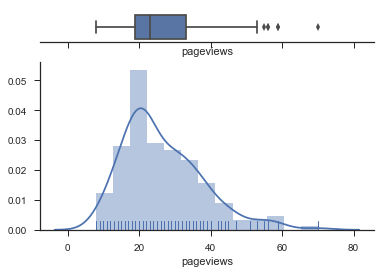

In [20]:
stats(daily_pageviews, 'pageviews')

Jumping back to the data set that includes 2015-2015 web traffic from Watsi..Let's reset the index of the dataframe 'data' back to what it was before we made it 'timestamp' and confirm the change with data.info()

In [21]:
data = data.reset_index(drop=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
referrer           4999 non-null object
timestamp          4999 non-null datetime64[ns]
title              4999 non-null object
url                4999 non-null object
user_agent         4999 non-null object
user_id            4999 non-null object
referrer_domain    4999 non-null object
website_section    4999 non-null object
platform           4999 non-null object
pageviews          4999 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 390.6+ KB


#### Save the resulting data to a file for future analysis ####

And we'll call head() to review before saving..

In [22]:
data.head()

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,pageviews
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop,1
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,1
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,1
3,,2016-02-05 21:19:30,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,MICHEL O,,,Desktop,1
4,https://watsi.org/fund-treatments,2016-02-14 19:30:08,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,ANDREE N,watsi.org,,Desktop,1


Let's now save the 'data' dataframe to a csv for use in the next lab and bring this lab to an end.

In [23]:
data.to_csv('Lab_01_output.csv', )

 Good job!